<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Reinforcement_Learning/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

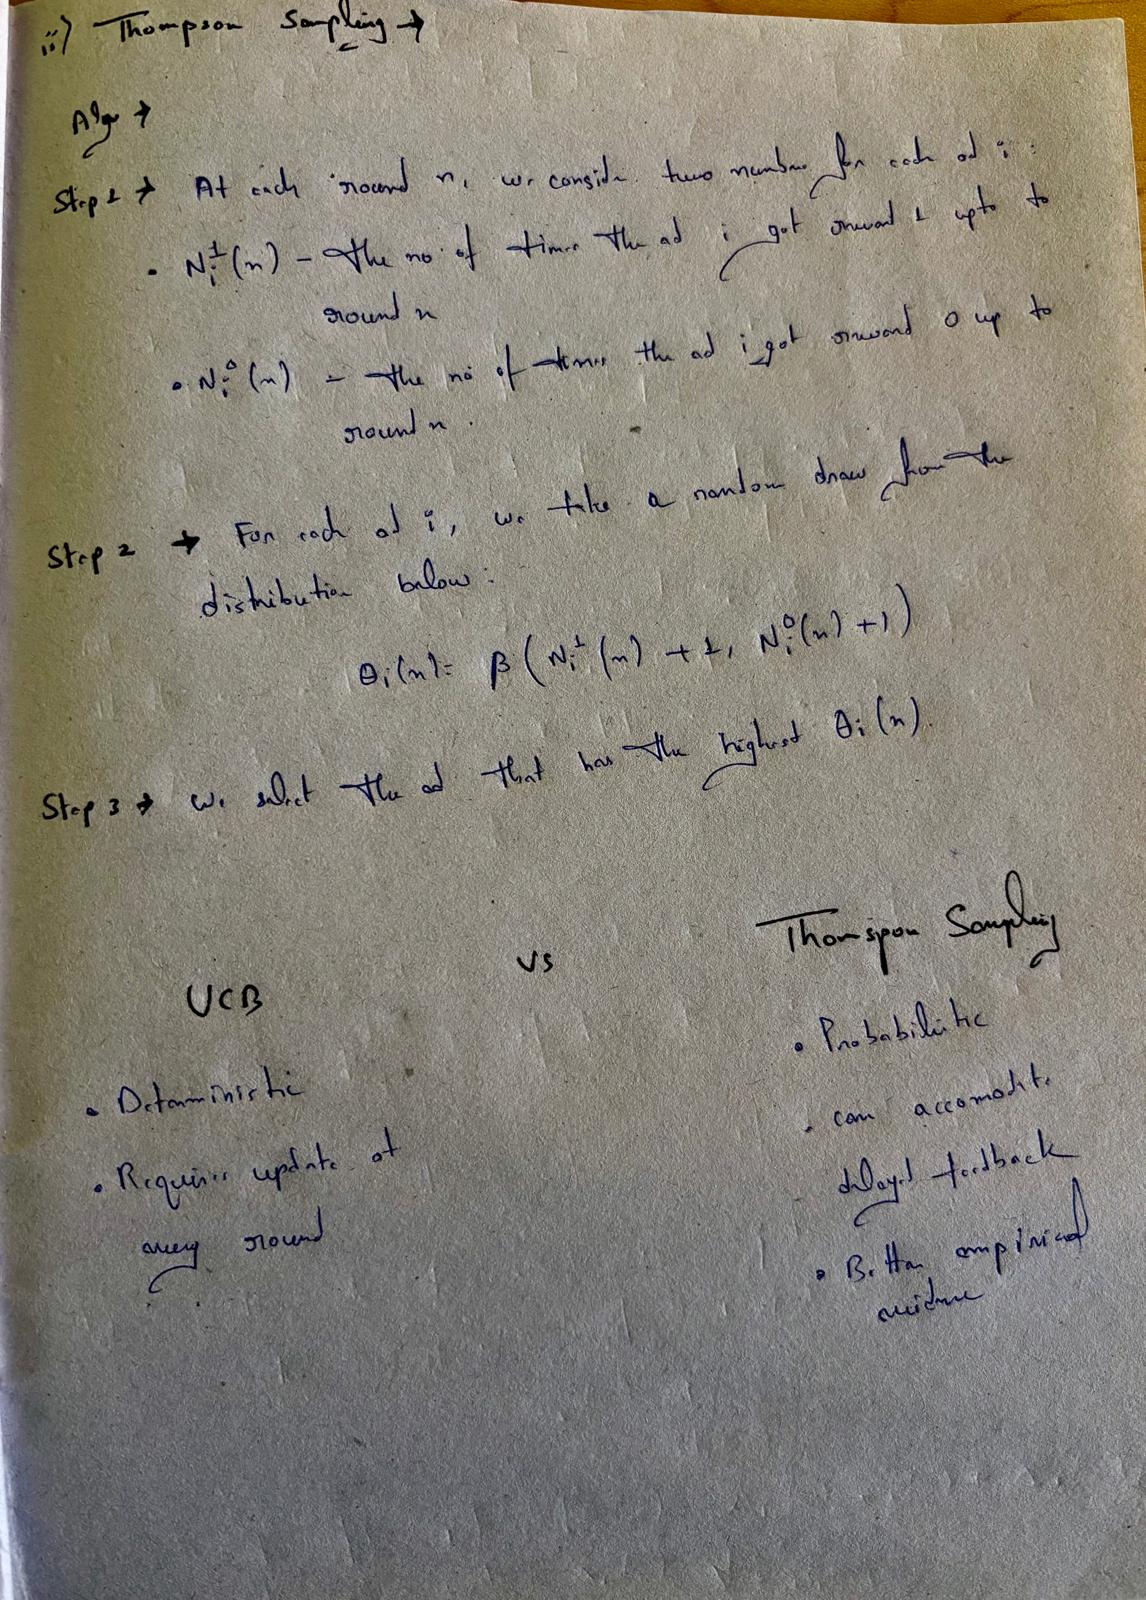

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [18]:
import random
N = 500   # thompson sampling works perfectly on lower number of rounds too
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

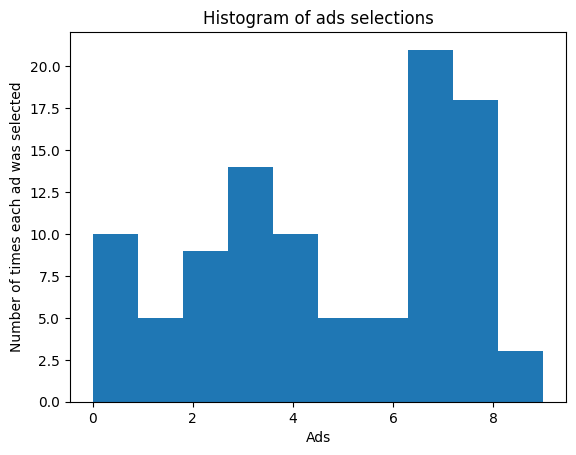

In [16]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

how is the Thomspon algo different from UCB ?

Fantastic question, Tushar! 🔍
**Thompson Sampling vs UCB** is one of the most important comparisons in the **Multi-Armed Bandit world**. Let’s walk through their **differences**, step-by-step — visually, intuitively, and mathematically.

---

## 🎯 Problem Recap: Multi-Armed Bandit

You have **N options (ads, treatments, products)** and you're trying to:

* **Explore** new options
* **Exploit** what’s working
* Maximize **total reward** over time

---

## ⚖️ The Core Difference

| Feature              | **UCB (Upper Confidence Bound)**     | **Thompson Sampling**                 |
| -------------------- | ------------------------------------ | ------------------------------------- |
| Type                 | Deterministic                        | Probabilistic (Bayesian)              |
| Exploration strategy | Pick arm with highest upper bound    | Sample from probability distribution  |
| When it explores     | Less confidence → more exploration   | Samples naturally include uncertainty |
| Formula basis        | Hoeffding bound (statistical theory) | Bayesian updating (Beta distribution) |
| Easy to explain?     | Yes (simple math)                    | Harder (needs understanding of Bayes) |

---

## 🔢 Side-by-Side Example

### Suppose you have 3 ads (arms):

| Ad | True CTR |
| -- | -------- |
| A  | 0.1      |
| B  | 0.15     |
| C  | 0.05     |

---

### 🔹 UCB: Works Like This

For each round:

```python
UCB_i = average_reward_i + sqrt(2 * log(n) / n_i)
```

* **Keeps track of mean reward**
* Adds a **confidence interval**
* Picks the ad with the highest **UCB score**

📌 UCB **forces exploration** early by artificially boosting rarely seen arms.

---

### 🔹 Thompson Sampling: Works Like This

For each ad, maintain:

```python
Beta(successes + 1, failures + 1)
```

* Sample a random value from this distribution
* Pick the ad with the **highest sampled value**
* If it gets a reward (e.g., click), increase **success count**
* Otherwise, increase **failure count**

📌 Thompson **explores naturally** using probability.

---

## 🔄 Code Comparison (Minimal):

### ✅ UCB Code (core logic):

```python
average_reward = total_reward[i] / count[i]
confidence = sqrt(2 * log(n) / count[i])
ucb_score = average_reward + confidence
```

### ✅ Thompson Sampling Code (core logic):

```python
sample = random.betavariate(successes[i] + 1, failures[i] + 1)
```

---

## 📊 Intuition:

| Think of it like... | UCB                                    | Thompson Sampling                          |
| ------------------- | -------------------------------------- | ------------------------------------------ |
| 🎯 Strategy         | “Be **optimistic** about unknown arms” | “**Sample** based on how confident we are” |
| 🤖 Behavior         | Hard-coded explore rule                | Exploration emerges **organically**        |
| 🔁 Flexibility      | Less adaptive                          | More adaptive in noisy environments        |
| 💡 Randomness       | No (picks max)                         | Yes (samples from distributions)           |

---

## ✅ When to Use What?

| Use Case                                                    | Recommended Algorithm               |
| ----------------------------------------------------------- | ----------------------------------- |
| **You want explainability**                                 | UCB                                 |
| **Rewards are noisy/sparse**                                | Thompson Sampling                   |
| **High-dimensional arms** (e.g., ads with lots of features) | Thompson Sampling (easier to scale) |
| **Fast decision-making** (lightweight)                      | UCB                                 |

---

## 🎓 Final Summary:

| Aspect             | UCB                                 | Thompson Sampling                               |
| ------------------ | ----------------------------------- | ----------------------------------------------- |
| **Exploration**    | Forced via confidence bonus         | Emergent via random sampling                    |
| **Predictability** | Always picks same arm at same state | Can vary due to randomness                      |
| **Performance**    | Strong in theory                    | Often better **in practice**                    |
| **Ease to tune**   | Requires setting no params          | Needs Beta prior setup (but default works well) |

---
